<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: Ratas.py 🐁

- Nombre de alumno 1: Geraldyn Pérez
- Nombre de alumno 2: Diego Rojas

### **Link de repositorio de GitHub:** [Repositorio](https://github.com/Geral37/MDS7202.git)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [290]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [ ]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [2]:
#Codigo Aqui
# Cargar los datos
df = pd.read_csv('energia_homero.csv')

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Visualizar el consumo de energía usando plotly
fig = px.line(df, x='date', y='Energy_kWh', title='Consumo de Energía en la Casa de Homero')
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [3]:
#CODIGO AQUI
#0. Cree un conjunto de entrenamiento y uno de prueba
df['set'] = np.where(df.date >= pd.Timestamp('2020-03-01'), 'Test', 'Train')

train = df[df['set'] == 'Train'].copy()
test = df[df['set'] == 'Test'].copy()

target = 'Energy_kWh'

X_train = train.drop(columns = ['set'])
y_train = train[target].copy()

X_test = test.drop(columns = ['set'])
y_test = test[target].copy()

In [4]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
#Definimos una clase util
class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):

        X = X.copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

In [6]:
#1. Nombre al pipeline `Pipeline_trend`
Pipeline_trend = Pipeline([
    ('time_features', TimeTransformer()),
    ('ols', LinearRegression())
])

#2. Entrene el modelo lineal y luego obtenga predicciones
Pipeline_trend.fit(X_train, y_train)
train_pred = Pipeline_trend.predict(X_train)
test_pred = Pipeline_trend.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])


#2. grafique las predicciones
fig = px.scatter(df, x=df.date, y=target, title='Forecast de Homero', color='set')
fig.add_scatter(x=df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

#2. calcule el MAE
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 10.57
MAE Test: 8.66


In [7]:
#3. Grafique el error
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

*¿Hay un comportamiento estacional en la serie?*
Si?

In [8]:
#Redefinimos la clase util para incluir Fourier
class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

*Determine el valor de Periodos `P` y el número de terminos de Fourier `n`*

Como tenemos datos diarios de consumo energético para diferentes años, se usará `P=365`. Además se va a usar el valor usual para el número de terminos de Fourier, es decir, `n=4`.


In [9]:
#4. Nombre a este pipeline `Pipeline_seasonal`.
Pipeline_seasonal = Pipeline([
    ('time_features', TimeTransformer(n = 4, p = 365)),
    ('ols', LinearRegression())
])

#5. Entrene el nuevo modelo y obtenga predicciones
Pipeline_seasonal.fit(X_train, y_train)
train_pred = Pipeline_seasonal.predict(X_train)
test_pred = Pipeline_seasonal.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])


#5. grafique las predicciones
fig = px.scatter(df, x=df.date, y=target, title='Forecast de Homero', color='set')
fig.add_scatter(x=df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

#5. calcule el MAE
mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

#6. Grafique el error
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

MAE Train: 5.35
MAE Test: 4.46


*Comente los resultados*

El MAE se redujo casi a la mitad y la serie de los errores se suavizaron un poco teniendo un comportamiento más parecido a una serie estacionaria.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [11]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

from sklearn.metrics import mean_absolute_error

**Respuesta:**

In [12]:
# Renombrar columnas en el DataFrame original y los conjuntos de entrenamiento y prueba
#df = df.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

X_train = X_train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
X_test = X_test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
y_train = y_train.rename('y')
y_test = y_test.rename('y')

# Crear y ajustar el modelo Prophet
model = Prophet()
model.fit(X_train)

# Preparar las predicciones para el conjunto de prueba
future = model.make_future_dataframe(periods=len(X_test), freq='D')
forecast = model.predict(future)

# Graficar las predicciones y componentes del modelo
model.plot(forecast)
model.plot_components(forecast)

# Calcular el MAE en entrenamiento y prueba
train_pred = forecast['yhat'][:len(X_train)]
test_pred = forecast['yhat'][len(X_train):]
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

# Mostrar los MAE
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)

19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
19:47:50 - cmdstanpy - INFO - Chain [1] start processing
19:47:50 - cmdstanpy - INFO - Chain [1] done processing
19:47:50 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 


RuntimeError: Error during optimization! Command 'C:\Users\geral\anaconda3\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=72117 data file=C:\Users\geral\AppData\Local\Temp\tmpksk7zigv\rns8rb1f.json init=C:\Users\geral\AppData\Local\Temp\tmpksk7zigv\dxyeiffd.json output file=C:\Users\geral\AppData\Local\Temp\tmpksk7zigv\prophet_model1x8yab6y\prophet_model-20241017194750.csv method=optimize algorithm=newton iter=10000' failed: 

In [302]:
# Calcular el error (Valor real - Valor predicho) en entrenamiento y prueba
error_train = y_train - train_pred
error_test = y_test - test_pred

# Concatenar los errores de entrenamiento y prueba
error_total = pd.concat([error_train, error_test])

# Graficar el error utilizando Plotly
import plotly.graph_objs as go

fig = go.Figure()

# Graficar el error
fig.add_trace(go.Scatter(
    x=pd.concat([X_train['ds'], X_test['ds']]),
    y=error_total,
    mode='lines',
    name='Error (Valor real - Valor predicho)',
    line=dict(color='blue')
))

# Actualizar el layout del gráfico
fig.update_layout(
    title='Error en la Predicción',
    xaxis_title='Fecha',
    yaxis_title='Error',
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

El MAE sube un poco.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [303]:
X_train.columns

Index(['ds', 'y'], dtype='object')

In [304]:
# 1. Leer los datos del archivo datos_frink.csv
frink_data = pd.read_csv('datos_frink.csv')
frink_data

,date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,2016-06-01,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,2016-06-02,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,2016-06-03,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,2016-06-04,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,2016-06-05,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2020-07-03,96,84.7,74,76,72.8,67,91,69.6,38,24,6.3,0,29.9,29.9,29.8
1494,2020-07-04,97,84.6,73,76,72.9,70,94,70.5,43,10,3.6,0,29.9,29.8,29.7
1495,2020-07-05,95,85.4,79,75,73.5,68,88,69.0,44,12,6.2,0,29.8,29.7,29.7
1496,2020-07-06,91,85.5,82,77,75.5,72,82,71.9,59,10,6.0,0,29.8,29.8,29.7


In [305]:
# Verificar si hay NaN en todo el DataFrame
print("NaN en el DataFrame completo:")
print(frink_data.isnull().sum())


NaN en el DataFrame completo:
date         0
Temp_max     0
Temp_avg     0
Temp_min     0
Dew_max      0
Dew_avg      0
Dew_min      0
Hum_max      0
Hum_avg      0
Hum_min      0
Wind_max     0
Wind_avg     0
Wind_min     0
Press_max    0
Press_avg    0
Press_min    0
dtype: int64


In [306]:
X_train

,ds,y
0,2016-06-01,29.691
1,2016-06-02,28.789
2,2016-06-03,19.247
3,2016-06-04,22.883
4,2016-06-05,25.195
...,...,...
1364,2020-02-25,9.630
1365,2020-02-26,10.203
1366,2020-02-27,12.040
1367,2020-02-28,10.771


In [307]:
#CODIGO AQUI

from prophet.utilities import regressor_coefficients
from sklearn.metrics import mean_absolute_error
import plotly.graph_objs as go

# 1. Leer los datos del archivo datos_frink.csv
frink_data = pd.read_csv('datos_frink.csv')

# Asegúrate de que la columna de fechas sea del tipo datetime
frink_data['date'] = pd.to_datetime(frink_data['date'])

# Merge con X_train y X_test basado en la columna 'date'
X_train = pd.merge(X_train, frink_data, left_on='ds', right_on='date', how='left', suffixes=('', '_frink'))
X_test = pd.merge(X_test, frink_data, left_on='ds', right_on='date', how='left', suffixes=('', '_frink'))

# 2. Función para entrenar el modelo Prophet con un regresor
def train_with_regressor(regressor):
    # Crear y ajustar el modelo Prophet con el regresor
    model = Prophet(uncertainty_samples=1000)
    model.add_regressor(regressor)
    model.fit(X_train[['ds', 'y', regressor]])

    # Preparar las predicciones para el conjunto de prueba
    future = model.make_future_dataframe(periods=len(X_test), freq='D')
    future = pd.merge(future, frink_data, left_on='ds', right_on='date', how='left', suffixes=('', '_reg'))

    forecast = model.predict(future)

    # Calcular el MAE en entrenamiento y prueba
    train_pred = forecast['yhat'][:len(X_train)]
    test_pred = forecast['yhat'][len(X_train):]
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    # Extraer los coeficientes beta de los regresores
    coefficients = regressor_coefficients(model)
    regressor_beta = coefficients.loc[coefficients['regressor'] == regressor]

    return train_mae, test_mae, regressor_beta

# 3. Probar cada regresor de forma individual
regresores = ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min',
              'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min',
              'Press_max', 'Press_avg', 'Press_min']

regresores0 = ['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min',
              'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min',
              'Press_max', 'Press_avg', 'Press_min']

resultados = []

for reg in regresores:
    train_mae, test_mae, regressor_beta = train_with_regressor(reg)
    print(regressor_beta)
    resultados.append({
    'Regresor': reg,
    'Train MAE': train_mae,
    'Test MAE': test_mae,
    'Coeficiente': regressor_beta['coef'].values[0],  # Actualiza a 'coef'
    'Intervalo Inferior (Coef)': regressor_beta['coef_lower'].values[0],  # Actualiza a 'coef_lower'
    'Intervalo Superior (Coef)': regressor_beta['coef_upper'].values[0]  # Actualiza a 'coef_upper'
    })


# Mostrar resultados de los regresores
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

# 4. Probar con todos los regresores juntos
model_all = Prophet()

# Añadir todos los regresores al modelo
for reg in regresores:
    model_all.add_regressor(reg)

model_all.fit(X_train[['ds', 'y'] + regresores])

# Preparar las predicciones para el conjunto de prueba
future_all = model_all.make_future_dataframe(periods=len(X_test), freq='D')
future_all = pd.merge(future_all, frink_data, left_on='ds', right_on='date', how='left', suffixes=('', '_reg'))

forecast_all = model_all.predict(future_all)

# Calcular el MAE con todos los regresores
train_pred_all = forecast_all['yhat'][:len(X_train)]
test_pred_all = forecast_all['yhat'][len(X_train):]
train_mae_all = mean_absolute_error(y_train, train_pred_all)
test_mae_all = mean_absolute_error(y_test, test_pred_all)

print('Train MAE with all regressors:', train_mae_all)
print('Test MAE with all regressors:', test_mae_all)

# Extraer los coeficientes beta para todos los regresores
coefficients_all = regressor_coefficients(model_all)
print(coefficients_all)

# 5. Graficar el error con todos los regresores
error_train_all = y_train - train_pred_all
error_test_all = y_test - test_pred_all
error_total_all = pd.concat([error_train_all, error_test_all])

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=pd.concat([X_train['ds'], X_test['ds']]),
    y=error_total_all,
    mode='lines',
    name='Error (Valor real - Valor predicho)',
    line=dict(color='blue')
))

fig.update_layout(
    title='Error en la Predicción con Todos los Regresores',
    xaxis_title='Fecha',
    yaxis_title='Error',
    template='plotly_white'
)

fig.show()

  regressor regressor_mode    center  coef_lower      coef  coef_upper
0  Temp_max       additive  80.39664    0.230389  0.230389    0.230389
  regressor regressor_mode     center  coef_lower     coef  coef_upper
0  Temp_avg       additive  70.891234     0.22759  0.22759     0.22759
  regressor regressor_mode     center  coef_lower      coef  coef_upper
0  Temp_min       additive  62.490869    0.160415  0.160415    0.160415
  regressor regressor_mode     center  coef_lower      coef  coef_upper
0   Dew_max       additive  66.024105    0.080248  0.080248    0.080248
  regressor regressor_mode     center  coef_lower      coef  coef_upper
0   Dew_avg       additive  61.462893    0.082203  0.082203    0.082203
  regressor regressor_mode     center  coef_lower      coef  coef_upper
0   Dew_min       additive  56.195033    0.066689  0.066689    0.066689
  regressor regressor_mode     center  coef_lower      coef  coef_upper
0   Hum_max       additive  92.945946   -0.004102 -0.004102   -0.004

No sé que hacer para que los limites del intervalo sean distintos al coeficiente kdfjgkl :(

Sin eso no podemos ver si es significativo, pero por ahora la temperatura promedio seria buena viendo el MAE más bajo. Sale también que la presión podria ser buen regresor pero solo por el valor del coeficiente, no tanto por MAE pero no sabemos si es significativo.

Tomando todos los regresores se obtiene un MAE un poco mayor al primer modelo.

Se puede mejorar.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [308]:
frink_data.columns

Index(['date', 'Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg',
       'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg',
       'Wind_min', 'Press_max', 'Press_avg', 'Press_min'],
      dtype='object')

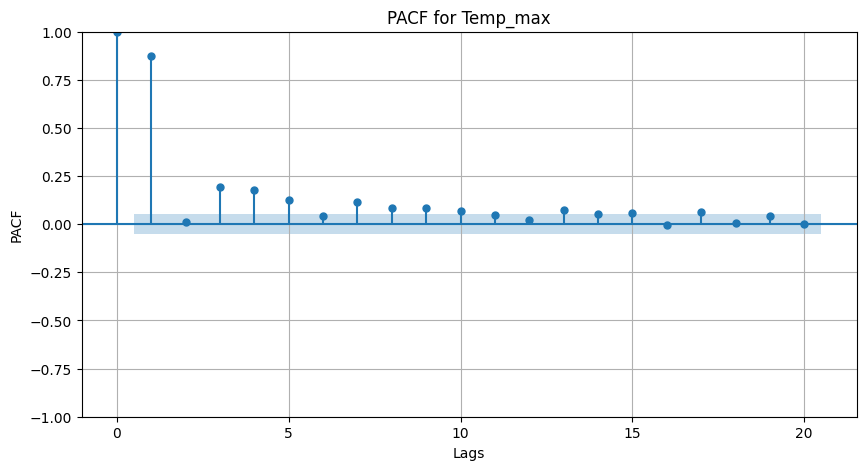

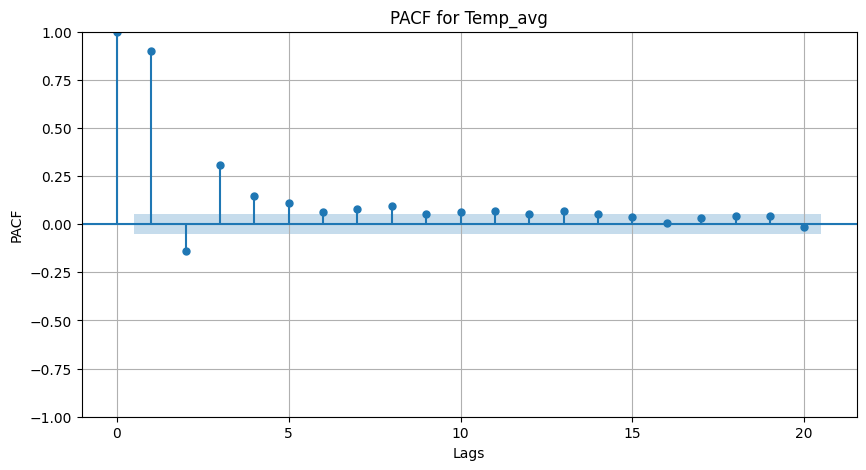

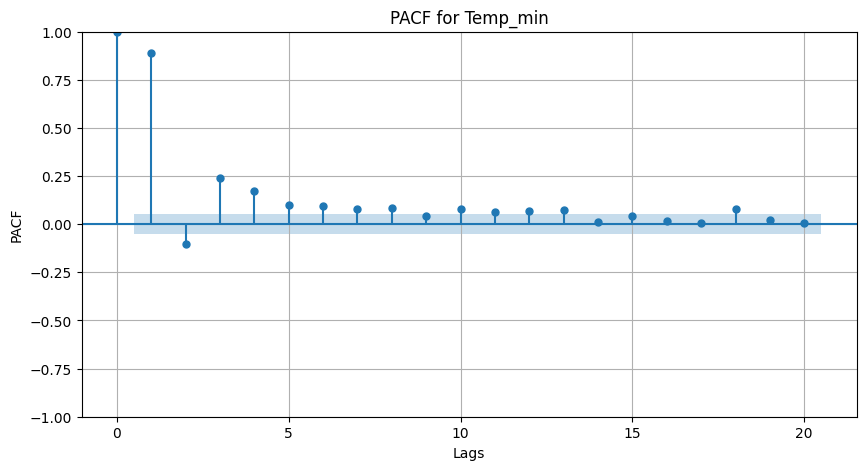

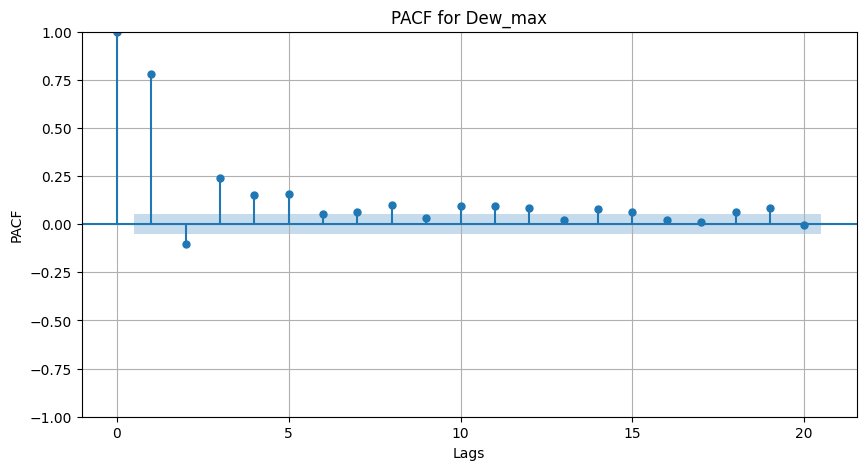

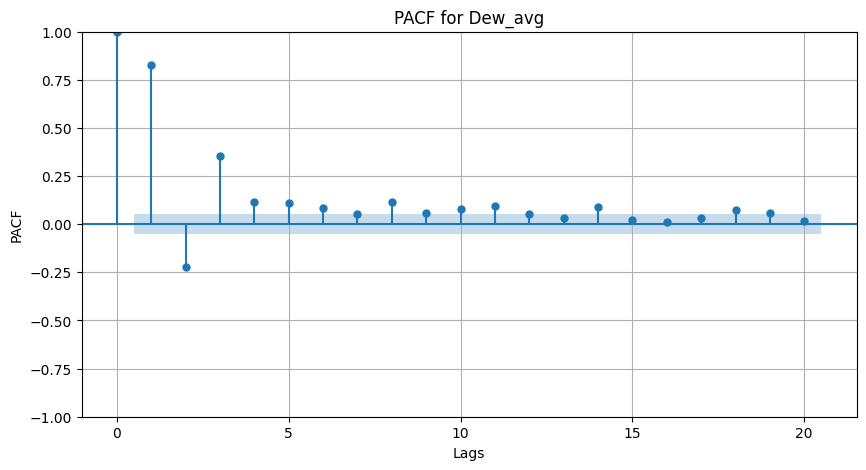

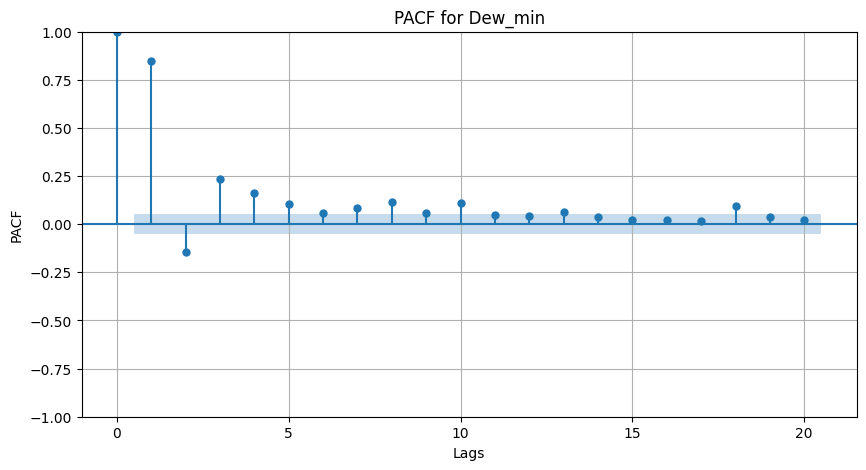

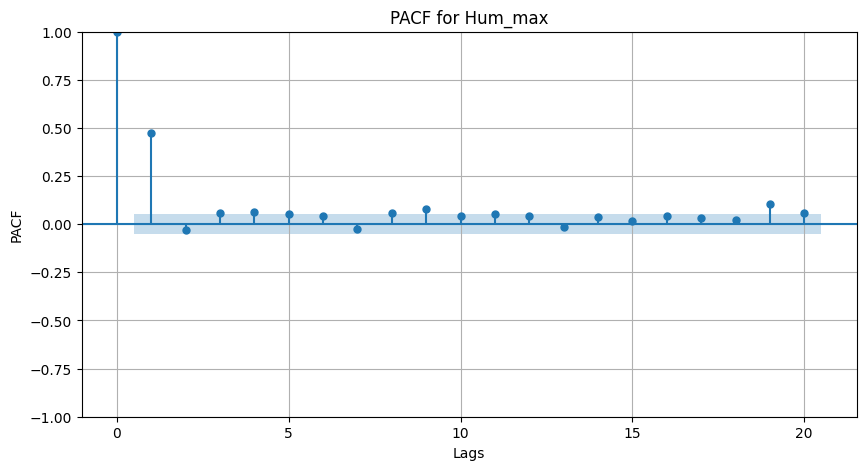

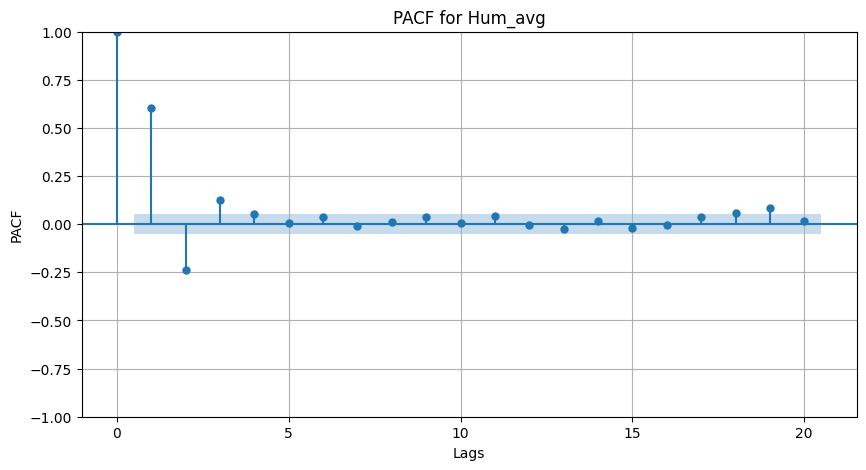

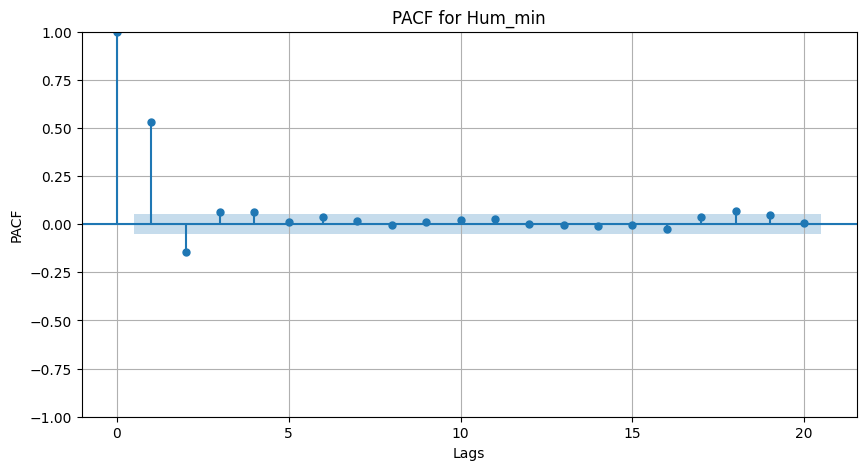

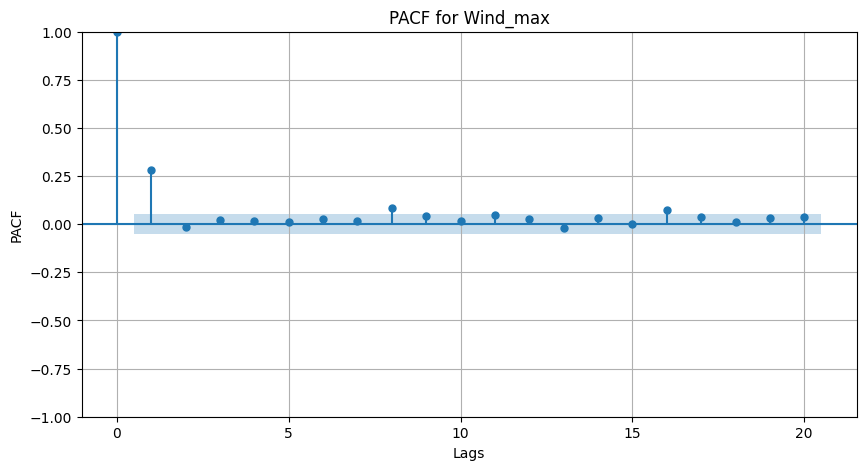

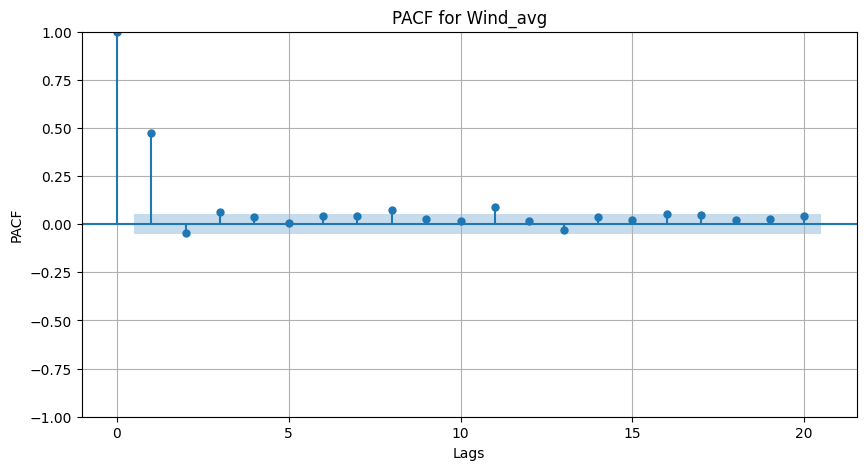

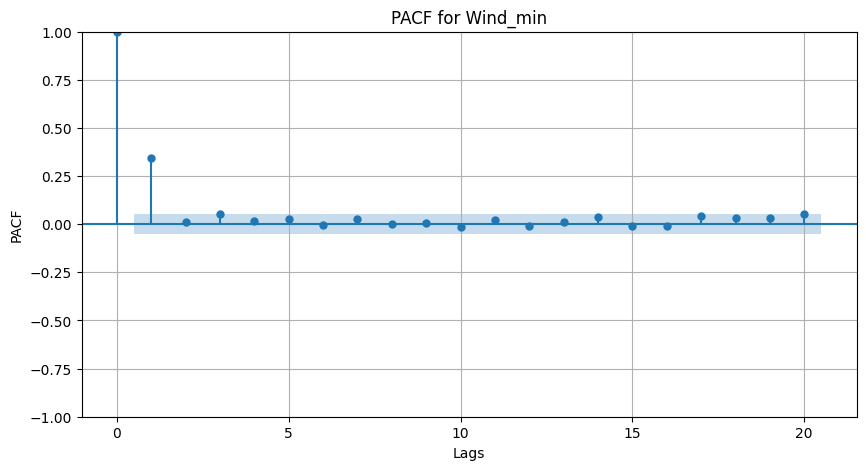

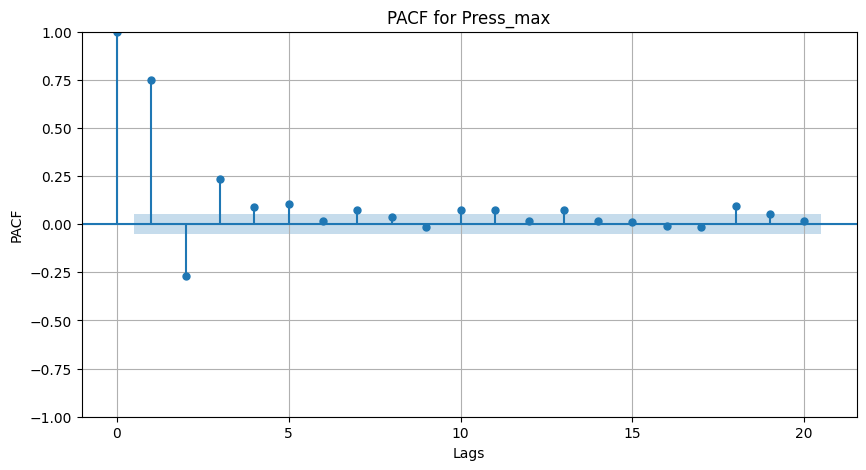

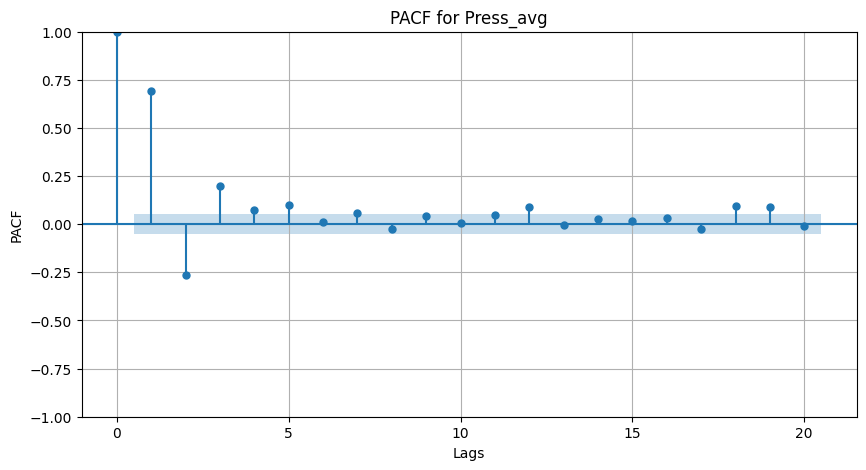

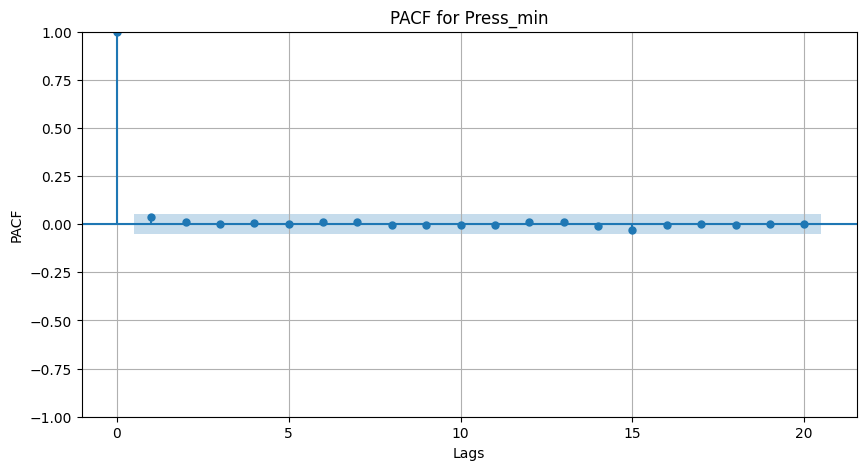

In [309]:
#CODIGO AQUI

#import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Aquí seleccionamos las variables exógenas de interés
exogenous_vars = ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg',
                  'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max',
                  'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg', 'Press_min']

# Calcular y graficar la PACF para cada variable
for var in exogenous_vars:
    plt.figure(figsize=(10, 5))
    plot_pacf(frink_data[var].dropna(), lags=20, ax=plt.gca())
    plt.title(f'PACF for {var}')
    plt.xlabel('Lags')
    plt.ylabel('PACF')
    plt.grid()
    plt.show()


In [310]:
frink_data

,date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,2016-06-01,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,2016-06-02,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,2016-06-03,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,2016-06-04,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,2016-06-05,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2020-07-03,96,84.7,74,76,72.8,67,91,69.6,38,24,6.3,0,29.9,29.9,29.8
1494,2020-07-04,97,84.6,73,76,72.9,70,94,70.5,43,10,3.6,0,29.9,29.8,29.7
1495,2020-07-05,95,85.4,79,75,73.5,68,88,69.0,44,12,6.2,0,29.8,29.7,29.7
1496,2020-07-06,91,85.5,82,77,75.5,72,82,71.9,59,10,6.0,0,29.8,29.8,29.7


In [311]:
# 1. Leer los datos del archivo datos_frink.csv
frink_data = pd.read_csv('datos_frink.csv')
frink_data

,date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min
0,2016-06-01,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7
1,2016-06-02,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7
2,2016-06-03,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7
3,2016-06-04,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7
4,2016-06-05,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2020-07-03,96,84.7,74,76,72.8,67,91,69.6,38,24,6.3,0,29.9,29.9,29.8
1494,2020-07-04,97,84.6,73,76,72.9,70,94,70.5,43,10,3.6,0,29.9,29.8,29.7
1495,2020-07-05,95,85.4,79,75,73.5,68,88,69.0,44,12,6.2,0,29.8,29.7,29.7
1496,2020-07-06,91,85.5,82,77,75.5,72,82,71.9,59,10,6.0,0,29.8,29.8,29.7


In [312]:
X_train.columns.tolist()

['ds',
 'y',
 'date',
 'Temp_max',
 'Temp_avg',
 'Temp_min',
 'Dew_max',
 'Dew_avg',
 'Dew_min',
 'Hum_max',
 'Hum_avg',
 'Hum_min',
 'Wind_max',
 'Wind_avg',
 'Wind_min',
 'Press_max',
 'Press_avg',
 'Press_min']

In [313]:
# Función para crear lags
def create_lags(data, var, lags):
    # Crear los lags y almacenarlos en un DataFrame temporal
    lagged_data = data.copy()
    for lag in range(1, lags + 1):
        lagged_data[f'{var}_lag{lag}'] = lagged_data[var].shift(lag)  # Crear la columna de lag
    return lagged_data[[f'{var}_lag{lag}' for lag in range(1, lags + 1)]]  # Retornar solo las columnas de lags

# Listas de variables para cada cantidad de lags
lags_1 = ['Temp_max', 'Hum_max', 'Wind_max', 'Wind_avg', 'Wind_min']  # Variables con 1 lag
lags_2 = ['Dew_min', 'Hum_avg', 'Hum_min']  # Variables con 2 lags
lags_3 = ['Temp_avg', 'Temp_min', 'Dew_avg', 'Dew_max', 'Press_max', 'Press_avg']  # Variables con 3 lags

# Crear un nuevo DataFrame para los lags
data_frink_lags = pd.DataFrame()

# Crear lags para cada grupo de variables y agregar solo una vez la columna 'date'
for var in lags_1:
    lagged_data = create_lags(frink_data[[var]], var, 1)  # Crear 1 lag
    data_frink_lags = pd.concat([data_frink_lags, lagged_data], axis=1)

for var in lags_2:
    lagged_data = create_lags(frink_data[[var]], var, 2)  # Crear 2 lags
    data_frink_lags = pd.concat([data_frink_lags, lagged_data], axis=1)

for var in lags_3:
    lagged_data = create_lags(frink_data[[var]], var, 3)  # Crear 3 lags
    data_frink_lags = pd.concat([data_frink_lags, lagged_data], axis=1)

# Agregar la columna 'date' solo una vez
data_frink_lags['date'] = frink_data['date'].values

# Asegurarse de que las columnas 'ds' y 'date' son de tipo datetime
X_train['ds'] = pd.to_datetime(X_train['ds'])
data_frink_lags['date'] = pd.to_datetime(data_frink_lags['date'])

# Merge con X_train y X_test basado en la columna 'date'
X_train = pd.merge(X_train, data_frink_lags, left_on='ds', right_on='date', how='left', suffixes=('', '_frink'))
X_test = pd.merge(X_test, data_frink_lags, left_on='ds', right_on='date', how='left', suffixes=('', '_frink'))

In [314]:
X_train.columns.tolist()

['ds',
 'y',
 'date',
 'Temp_max',
 'Temp_avg',
 'Temp_min',
 'Dew_max',
 'Dew_avg',
 'Dew_min',
 'Hum_max',
 'Hum_avg',
 'Hum_min',
 'Wind_max',
 'Wind_avg',
 'Wind_min',
 'Press_max',
 'Press_avg',
 'Press_min',
 'Temp_max_lag1',
 'Hum_max_lag1',
 'Wind_max_lag1',
 'Wind_avg_lag1',
 'Wind_min_lag1',
 'Dew_min_lag1',
 'Dew_min_lag2',
 'Hum_avg_lag1',
 'Hum_avg_lag2',
 'Hum_min_lag1',
 'Hum_min_lag2',
 'Temp_avg_lag1',
 'Temp_avg_lag2',
 'Temp_avg_lag3',
 'Temp_min_lag1',
 'Temp_min_lag2',
 'Temp_min_lag3',
 'Dew_avg_lag1',
 'Dew_avg_lag2',
 'Dew_avg_lag3',
 'Dew_max_lag1',
 'Dew_max_lag2',
 'Dew_max_lag3',
 'Press_max_lag1',
 'Press_max_lag2',
 'Press_max_lag3',
 'Press_avg_lag1',
 'Press_avg_lag2',
 'Press_avg_lag3',
 'date_frink']

In [315]:
data_frink_lags

,Temp_max_lag1,Hum_max_lag1,Wind_max_lag1,Wind_avg_lag1,Wind_min_lag1,Dew_min_lag1,Dew_min_lag2,Hum_avg_lag1,Hum_avg_lag2,Hum_min_lag1,...,Dew_max_lag1,Dew_max_lag2,Dew_max_lag3,Press_max_lag1,Press_max_lag2,Press_max_lag3,Press_avg_lag1,Press_avg_lag2,Press_avg_lag3,date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-01
1,85.0,100.0,21.0,9.5,0.0,66.0,NaN,89.4,NaN,65.0,...,74.0,NaN,NaN,29.8,NaN,NaN,29.8,NaN,NaN,2016-06-02
2,76.0,100.0,18.0,7.8,0.0,66.0,66.0,96.8,89.4,89.0,...,74.0,74.0,NaN,29.8,29.8,NaN,29.8,29.8,NaN,2016-06-03
3,79.0,100.0,18.0,4.7,0.0,68.0,66.0,93.6,96.8,72.0,...,72.0,74.0,74.0,29.8,29.8,29.8,29.8,29.8,29.8,2016-06-04
4,76.0,100.0,20.0,7.0,0.0,66.0,68.0,96.1,93.6,85.0,...,73.0,72.0,74.0,29.8,29.8,29.8,29.7,29.8,29.8,2016-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,96.0,85.0,9.0,6.0,3.0,70.0,73.0,66.2,71.0,43.0,...,77.0,78.0,78.0,29.9,29.8,29.8,29.8,29.8,29.8,2020-07-03
1494,96.0,91.0,24.0,6.3,0.0,67.0,70.0,69.6,66.2,38.0,...,76.0,77.0,78.0,29.9,29.9,29.8,29.9,29.8,29.8,2020-07-04
1495,97.0,94.0,10.0,3.6,0.0,70.0,67.0,70.5,69.6,43.0,...,76.0,76.0,77.0,29.9,29.9,29.9,29.8,29.9,29.8,2020-07-05
1496,95.0,88.0,12.0,6.2,0.0,68.0,70.0,69.0,70.5,44.0,...,75.0,76.0,76.0,29.8,29.9,29.9,29.7,29.8,29.9,2020-07-06


In [316]:
# Obtener columnas que terminan en '_lag' seguido de un número
lag_columns = [col for col in data_frink_lags.columns if pd.Series(col).str.contains('_lag\d+$').any()]
print(lag_columns)
# Filtrar las columnas que tienen valores nulos
lag_columns_with_nans = [col for col in lag_columns if data_frink_lags[col].isnull().any()]

# Mostrar las columnas que tienen NaNs
print("Columnas con NaNs:", lag_columns_with_nans)

['Temp_max_lag1', 'Hum_max_lag1', 'Wind_max_lag1', 'Wind_avg_lag1', 'Wind_min_lag1', 'Dew_min_lag1', 'Dew_min_lag2', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_min_lag1', 'Hum_min_lag2', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_min_lag1', 'Temp_min_lag2', 'Temp_min_lag3', 'Dew_avg_lag1', 'Dew_avg_lag2', 'Dew_avg_lag3', 'Dew_max_lag1', 'Dew_max_lag2', 'Dew_max_lag3', 'Press_max_lag1', 'Press_max_lag2', 'Press_max_lag3', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3']
Columnas con NaNs: ['Temp_max_lag1', 'Hum_max_lag1', 'Wind_max_lag1', 'Wind_avg_lag1', 'Wind_min_lag1', 'Dew_min_lag1', 'Dew_min_lag2', 'Hum_avg_lag1', 'Hum_avg_lag2', 'Hum_min_lag1', 'Hum_min_lag2', 'Temp_avg_lag1', 'Temp_avg_lag2', 'Temp_avg_lag3', 'Temp_min_lag1', 'Temp_min_lag2', 'Temp_min_lag3', 'Dew_avg_lag1', 'Dew_avg_lag2', 'Dew_avg_lag3', 'Dew_max_lag1', 'Dew_max_lag2', 'Dew_max_lag3', 'Press_max_lag1', 'Press_max_lag2', 'Press_max_lag3', 'Press_avg_lag1', 'Press_avg_lag2', 'Press_avg_lag3']


In [317]:
# Imputar valores nulos de los nuevos atributos lags con la media de cada variable
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [320]:
X_train.columns.tolist()

['ds',
 'y',
 'date',
 'Temp_max',
 'Temp_avg',
 'Temp_min',
 'Dew_max',
 'Dew_avg',
 'Dew_min',
 'Hum_max',
 'Hum_avg',
 'Hum_min',
 'Wind_max',
 'Wind_avg',
 'Wind_min',
 'Press_max',
 'Press_avg',
 'Press_min',
 'Temp_max_lag1',
 'Hum_max_lag1',
 'Wind_max_lag1',
 'Wind_avg_lag1',
 'Wind_min_lag1',
 'Dew_min_lag1',
 'Dew_min_lag2',
 'Hum_avg_lag1',
 'Hum_avg_lag2',
 'Hum_min_lag1',
 'Hum_min_lag2',
 'Temp_avg_lag1',
 'Temp_avg_lag2',
 'Temp_avg_lag3',
 'Temp_min_lag1',
 'Temp_min_lag2',
 'Temp_min_lag3',
 'Dew_avg_lag1',
 'Dew_avg_lag2',
 'Dew_avg_lag3',
 'Dew_max_lag1',
 'Dew_max_lag2',
 'Dew_max_lag3',
 'Press_max_lag1',
 'Press_max_lag2',
 'Press_max_lag3',
 'Press_avg_lag1',
 'Press_avg_lag2',
 'Press_avg_lag3',
 'date_frink']

In [323]:
#CODIGO AQUI

from prophet.utilities import regressor_coefficients
from sklearn.metrics import mean_absolute_error
import plotly.graph_objs as go

# 2. Función para entrenar el modelo Prophet con un regresor
def train_with_regressor(regressor):
    # Crear y ajustar el modelo Prophet con el regresor
    model = Prophet(uncertainty_samples=1000)
    model.add_regressor(regressor)
    model.fit(X_train[['ds', 'y', regressor]])

    # Preparar las predicciones para el conjunto de prueba
    #future = model.make_future_dataframe(periods=len(X_test), freq='D')
    #future = pd.merge(future, X_test, left_on='ds', right_on='ds', how='left', suffixes=('', '_regresores2'))

    #forecast = model.predict(future)
    forecast = model.predict(X_test)

    # Calcular el MAE en entrenamiento y prueba
    train_pred = forecast['yhat'][:len(X_train)]
    test_pred = forecast['yhat'][len(X_train):]
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)x

    # Extraer los coeficientes beta de los regresores
    coefficients = regressor_coefficients(model)
    regressor_beta = coefficients.loc[coefficients['regressor'] == regressor]

    return train_mae, test_mae, regressor_beta

# 3. Probar cada regresor de forma individual
regresores0 = ['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min',
              'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min',
              'Press_max', 'Press_avg', 'Press_min']

regresores = ['Temp_max',
 'Temp_avg',
 'Temp_min',
 'Dew_max',
 'Dew_avg',
 'Dew_min',
 'Hum_max',
 'Hum_avg',
 'Hum_min',
 'Wind_max',
 'Wind_avg',
 'Wind_min',
 'Press_max',
 'Press_avg',
 'Press_min',
 'Temp_max_lag1',
 'Hum_max_lag1',
 'Wind_max_lag1',
 'Wind_avg_lag1',
 'Wind_min_lag1',
 'Dew_min_lag1',
 'Dew_min_lag2',
 'Hum_avg_lag1',
 'Hum_avg_lag2',
 'Hum_min_lag1',
 'Hum_min_lag2',
 'Temp_avg_lag1',
 'Temp_avg_lag2',
 'Temp_avg_lag3',
 'Temp_min_lag1',
 'Temp_min_lag2',
 'Temp_min_lag3',
 'Dew_avg_lag1',
 'Dew_avg_lag2',
 'Dew_avg_lag3',
 'Dew_max_lag1',
 'Dew_max_lag2',
 'Dew_max_lag3',
 'Press_max_lag1',
 'Press_max_lag2',
 'Press_max_lag3',
 'Press_avg_lag1',
 'Press_avg_lag2',
 'Press_avg_lag3']

resultados = []

for reg in regresores:
    train_mae, test_mae, regressor_beta = train_with_regressor(reg)
    print(regressor_beta)
    resultados.append({
    'Regresor': reg,
    'Train MAE': train_mae,
    'Test MAE': test_mae,
    'Coeficiente': regressor_beta['coef'].values[0],  # Actualiza a 'coef'
    'Intervalo Inferior (Coef)': regressor_beta['coef_lower'].values[0],  # Actualiza a 'coef_lower'
    'Intervalo Superior (Coef)': regressor_beta['coef_upper'].values[0]  # Actualiza a 'coef_upper'
    })


# Mostrar resultados de los regresores
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

# 4. Probar con todos los regresores juntos
model_all = Prophet()

# Añadir todos los regresores al modelo
for reg in regresores:
    model_all.add_regressor(reg)

model_all.fit(X_train[['ds', 'y'] + regresores])

# Preparar las predicciones para el conjunto de prueba
future_all = model_all.make_future_dataframe(periods=len(X_test), freq='D')
future_all = pd.merge(future_all, frink_data, left_on='ds', right_on='date', how='left', suffixes=('', '_reg'))

forecast_all = model_all.predict(future_all)

# Calcular el MAE con todos los regresores
train_pred_all = forecast_all['yhat'][:len(X_train)]
test_pred_all = forecast_all['yhat'][len(X_train):]
train_mae_all = mean_absolute_error(y_train, train_pred_all)
test_mae_all = mean_absolute_error(y_test, test_pred_all)

print('Train MAE with all regressors:', train_mae_all)
print('Test MAE with all regressors:', test_mae_all)

# Extraer los coeficientes beta para todos los regresores
coefficients_all = regressor_coefficients(model_all)
print(coefficients_all)

# 5. Graficar el error con todos los regresores
error_train_all = y_train - train_pred_all
error_test_all = y_test - test_pred_all
error_total_all = pd.concat([error_train_all, error_test_all])

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=pd.concat([X_train['ds'], X_test['ds']]),
    y=error_total_all,
    mode='lines',
    name='Error (Valor real - Valor predicho)',
    line=dict(color='blue')
))

fig.update_layout(
    title='Error en la Predicción con Todos los Regresores',
    xaxis_title='Fecha',
    yaxis_title='Error',
    template='plotly_white'
)

fig.show()

ValueError: Found input variables with inconsistent numbers of samples: [1369, 129]

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE en el conjunto de entrenamiento
train_pred = forecast[forecast['ds'].isin(X_train['ds'])]['yhat']
train_true = X_train['y'][X_train['ds'].isin(forecast['ds'])]
mae_train = mean_absolute_error(train_true, train_pred)

# Calcular MAE en el conjunto de prueba
test_pred = forecast[forecast['ds'].isin(X_test['ds'])]['yhat']
test_true = X_test['y'][X_test['ds'].isin(forecast['ds'])]
mae_test = mean_absolute_error(test_true, test_pred)

print(f'MAE en el conjunto de entrenamiento: {mae_train}')
print(f'MAE en el conjunto de prueba: {mae_test}')

import matplotlib.pyplot as plt

# Calcular el error
train_error = train_true - train_pred
test_error = test_true - test_pred

# Graficar el error
plt.figure(figsize=(14, 6))

# Graficar el error en el conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.plot(X_train['ds'], train_error, label='Error Entrenamiento', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Error en el Conjunto de Entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Error (Valor Real - Valor Predicho)')
plt.legend()

# Graficar el error en el conjunto de prueba
plt.subplot(1, 2, 2)
plt.plot(X_test['ds'], test_error, label='Error Prueba', color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Error en el Conjunto de Prueba')
plt.xlabel('Fecha')
plt.ylabel('Error (Valor Real - Valor Predicho)')
plt.legend()

plt.tight_layout()
plt.show()


## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [ ]:
#CODIGO AQUI

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [ ]:
#!pip install surprise

In [ ]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

import random

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [ ]:
#CODIGO AQUI
df2 = pd.read_csv('cervezas.csv')

print(df2.head())
print("\n")
print("Resumen de cervezas.csv:")
print(df2.info())
print("\n")
print("Estadísticas descriptivas:")
print(df2.describe())
print("\n")
print("Cantidad de valores nulos")
print(df2.isnull().sum())
print("\n")
print("Cantidad de cervezas distintas")
print(df2['beerId'].nunique())
print("\n")
print("Cantidad de ciudadanos")
print(df2['userId'].nunique())

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [ ]:
#1
# ¿Cuántos usuarios hay en los datos?
num_usuarios = df2['userId'].nunique()
print(f"\nNúmero de usuarios en los datos: {num_usuarios}")

# ¿Cuántos productos hay en los datos?
num_productos = df2['beerId'].nunique()
print(f"\nNúmero de productos (cervezas) en los datos: {num_productos}")

# ¿Cuántas calificaciones hay en los datos?
num_calificaciones = df2['rating'].count()
print(f"\nNúmero de calificaciones en los datos: {num_calificaciones}")

# ¿Cuántas calificaciones faltantes hay en los datos?
calificaciones_faltantes = df2['rating'].isnull().sum()
print(f"\nNúmero de calificaciones faltantes: {calificaciones_faltantes}")

# ¿Cuál es la media de las calificaciones entregadas por los usuarios?
media_calificaciones = df2['rating'].mean()
print(f"\nMedia de las calificaciones entregadas por los usuarios: {media_calificaciones:.2f}")

# Calcular la media de calificaciones por usuario
media_calificaciones = df2.groupby('userId')['rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(media_calificaciones.index, media_calificaciones.values, marker='o', linestyle='-', color='skyblue')

plt.title('Media de calificaciones por usuario', fontsize=14)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Media de calificaciones', fontsize=12)


plt.tight_layout()
plt.show()


# ¿Cómo cambia la media de calificaciones a través de los productos?

media_calificaciones2 = df2.groupby('beerId')['rating'].mean()

plt.figure(figsize=(10, 6))
plt.plot(media_calificaciones2.index, media_calificaciones2.values, marker='o', linestyle='-', color='skyblue')

plt.title('Media de calificaciones por producto', fontsize=14)
plt.xlabel('Beer ID', fontsize=12)
plt.ylabel('Media de calificaciones', fontsize=12)


plt.tight_layout()
plt.show()

#2
df2_agg = df2.groupby(['userId', 'beerName'])['rating'].mean().reset_index()

# Crear la matriz usuario-producto después de agregar las calificaciones
matriz_usuario_producto = df2_agg.pivot(index='userId', columns='beerName', values='rating')

print("\nMatriz (usuario, producto):")
print(matriz_usuario_producto)

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero esta buscando nuevas cervezas para su consumo personal, donde usted pudo notar que Homero esta identificado como `userId = 100` en el dataset. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Homero (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [ ]:
#CODIGO AQUI
# 1. Cree un dataframe que contenga las características de las cervezas
caracteristicas = df2.groupby('beerId')[['beerName', 'beerStyle']].first().reset_index()

# 2. Implemente el método Bag of Words para procesar la columna beerStyle 
vectorizer = CountVectorizer(lowercase = True, # transformación a minúsculas
                             min_df = 10, # mínimo 10 ocurrencias
                             stop_words = 'english') # eliminar stopwords
bow = vectorizer.fit_transform(caracteristicas['beerStyle']).toarray() # Vectorizamos texto
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out()) # Transformamos a Dataframe


# 3. Cree una función que imprima las top 5 cervezas similares a Chocolate Porter
cosine_sim = cosine_similarity(bow, bow)
def get_recommendations(df, beer, k=5):

    """
    Devuelve las k cervezas más similares utilizando Bag of Words.
    """

    # Verifica que la cerveza esté contenida en el dataset
    assert beer in df['beerName'].values, '¡La cerveza no está contenida en el dataset!'

    # Obtiene el índice de la cerveza
    idx = df[df['beerName'] == beer].index[0]

    # Obtiene las similitudes entre todas las cervezas con la cerveza especificada
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordena las cervezas según las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtiene las puntuaciones de las k cervezas más similares
    sim_scores = sim_scores[1:k + 1]

    # Obtiene los índices de las cervezas
    beer_indices = [i[0] for i in sim_scores]

    # Devuelve las k cervezas más similares
    return df['beerName'].iloc[beer_indices].values

print("Similares a Chocolate Porter:")
A = get_recommendations(df = caracteristicas, beer = 'Chocolate Porter')
print(A)
# 4. Identifique la cerveza mejor evaluada por Homero (userId = 100)
# Filtrar las calificaciones de Homero
calificaciones_homero = df2[df2['userId'] == 100]

# Obtener el índice de la mejor calificación
idx_mejor_calificacion = calificaciones_homero['rating'].idxmax()

# Obtener solo el nombre de la cerveza mejor evaluada
nombre_mejor_cerveza = calificaciones_homero.loc[idx_mejor_calificacion, 'beerName']

print("\n Top 5 cervezas para Homero:")
B = get_recommendations(df = caracteristicas, beer = nombre_mejor_cerveza)
print(B)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [ ]:
#CODIGO AQUI
# 1. Transforme el DataFrame de pandas a Dataset de surprise 
reader = Reader(rating_scale = (1, 5)) 

df_collaborative = df2[['userId', 'beerId', 'rating']].copy() 
dataset = Dataset.load_from_df(df_collaborative, reader)

# 2. Genere un conjunto de entrenamiento y uno de prueba
trainset, testset = train_test_split(dataset, test_size = 0.3, random_state = 1705)

# 3. Entrene un modelo de KNN basado en usuarios utilizando la similitud coseno
sim_options = {
    'name': 'cosine',
    'user_based': True 
}

knn = KNNBasic(sim_options=sim_options)
knn.fit(trainset)

# Luego realice predicciones en el conjunto de prueba
predictions = knn.test(testset)

# 4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo
print("MAE de KNN basado en usuarios:")
mae(predictions)

# 5. Repita utilizando un modelo de KNN basado en los productos
sim_options2 = {
    'name': 'cosine',
    'user_based': False
}

knn2 = KNNBasic(sim_options=sim_options2)
knn2.fit(trainset)

# Luego realice predicciones en el conjunto de prueba
predictions2 = knn2.test(testset)

# 4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo
print("MAE de KNN basado en productos:")
mae(predictions2)

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
#CODIGO AQUI
# 1. Entrene un modelo NMF
model = NMF(random_state = 1705)
model.fit(trainset)

# Genere predicciones para el conjunto de prueba
predictions = model.test(testset)

# 2. Calcule el MAE
print("MAE del modelo NMF:")
mae(predictions)

# muestre los resultados de las predicciones en un DataFrame
df_predictions = pd.DataFrame(predictions)
print(df_predictions.head())
print("\n")

# 3. Entrene un modelo SVD sobre el conjunto de entrenamiento
model2 = SVD()
model2.fit(trainset)

# Genere las predicciones para el conjunto de prueba
predictions2 = model2.test(testset)

# 4. Calcule el MAE de las predicciones 
print("MAE del modelo SDV:")
mae(predictions2)


# muestre los resultados de las predicciones en un DataFrame
df_predictions2 = pd.DataFrame(predictions2)
print(df_predictions2.head())

Al analizar las primeras cinco observaciones, se observa que el modelo SDV ofrece predicciones más cercanas a los valores reales en comparación con el modelo NMF. Además, el modelo SVD presenta un MAE de 0.4608, mientras que el NMF tiene un MAE de 0.4836, lo que indica que el SVD tiene un rendimiento superior, corroborando lo mencionado anteriormente.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Homero (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Homero, para estimar las calificaciones que Homero podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [ ]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [ ]:
#CODIGO AQUI
#1.
def get_top_n(predictions, n=10):
    """Devuelve las N mejores recomendaciones para cada usuario a partir de un conjunto de predicciones.

    Argumentos:
        predictions (lista de objetos Prediction): La lista de predicciones,
            como la que devuelve el método test de un algoritmo.
        n (int): El número de recomendaciones a generar para cada usuario. 
            El valor predeterminado es 10.

    Retorna:
    Un diccionario donde las claves son los ids (crudos) de los usuarios y los valores son listas de tuplas:
        [(id del ítem crudo, estimación de la calificación), ...] de tamaño n.
    """

    # Primero se asignan las predicciones a cada usuario.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Luego se ordenan las predicciones de cada usuario y se recuperan las k mejores.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def remove_duplicate_predictions(predictions):
    """Elimina predicciones duplicadas, manteniendo la de mayor estimación.

    Args:
        predictions (list of tuples): Lista de predicciones en formato (uid, iid, true_r, est, _).

    Returns:
        list: Lista de predicciones sin duplicados.
    """
    # Crear un diccionario para rastrear la mejor estimación para cada (usuario, ítem)
    best_predictions = {}

    for uid, iid, true_r, est, _ in predictions:
        # Si la predicción ya existe, verificamos si la nueva es mejor
        if (uid, iid) not in best_predictions or est > best_predictions[(uid, iid)][3]:
            best_predictions[(uid, iid)] = (uid, iid, true_r, est, _)

    # Convertimos el diccionario de vuelta a una lista
    return list(best_predictions.values())

# Para cada ciudadano, elimine las predicciones duplicadas
predictions_cleaned = remove_duplicate_predictions(predictions2)

top3 = get_top_n(predictions_cleaned, n=3)
homero_recommendations = top3[100]
print(homero_recommendations)

# 2.

full_trainset = dataset.build_full_trainset()
missing_ratings = full_trainset.build_anti_testset()
missing_ratings_user_100 = [entry for entry in missing_ratings if entry[0] == 100]
random_cervezas = random.sample(missing_ratings_user_100, 5)
predictions_for_100 = model2.test(random_cervezas)

# Mostrar las predicciones
for prediction in predictions_for_100:
    uid, iid, true_r, est, details = prediction
    print(f"Predicción para el usuario {uid} sobre la cerveza {iid} = {est}")

# 3.
k=10
t=3.5
precisions, recalls = precision_recall_at_k(predictions_cleaned, k = k, threshold = t)

# computamos la media entre todos los usuarios para cada métrica
precision = np.mean([precision for precision in precisions.values()])
recall = np.mean([recall for recall in recalls.values()])

print(f'precision @ {k}: {precision:.2f}')
print(f'recall @ {k}: {recall:.2f}')

El modelo presenta una precisión de 0.71, lo que indica que el 71% de las recomendaciones son relevantes, sugiriendo un buen desempeño en la selección de ítems valorados positivamente por los usuarios. Por otro lado, el recall es de 0.69, lo que significa que solo el 69% de los ítems realmente relevantes han sido recomendados. Aunque ambas métricas son aceptables, hay margen para mejorar, optimizando el modelo para aumentar tanto la precisión como el recall y recomendar más ítems relevantes.

In [ ]:
# 4.
k_values = list(range(3, 26))  
precisions_list = []
recalls_list = []

for k in k_values:
    precisions, recalls = precision_recall_at_k(predictions_cleaned, k=k)
    
    mean_precision = np.mean(list(precisions.values()))
    mean_recall = np.mean(list(recalls.values()))
    
    precisions_list.append(mean_precision)
    recalls_list.append(mean_recall)


plt.figure(figsize=(10, 6))
plt.plot(k_values, precisions_list, label='Precisión @ k', marker='o')
plt.plot(k_values, recalls_list, label='Recall @ k', marker='s')
plt.xlabel('k (Número de recomendaciones)')
plt.ylabel('Métricas')
plt.title('Precisión y Recall @ k')
plt.xticks(k_values)
plt.ylim(0.5, 0.75)
plt.legend()
plt.grid()
plt.show()

4. Se puede observar que a medida que aumenta `k` la precisión disminuye levemente, pero aumenta el recall.

In [ ]:
threshold_values = np.arange(3.0, 4.6, 0.1)  
precisions_list = []
recalls_list = []

for threshold in threshold_values:
    precisions, recalls = precision_recall_at_k(predictions_cleaned, threshold=threshold)
    
    mean_precision = np.mean(list(precisions.values()))
    mean_recall = np.mean(list(recalls.values()))
    
    precisions_list.append(mean_precision)
    recalls_list.append(mean_recall)


plt.figure(figsize=(10, 6))
plt.plot(threshold_values, precisions_list, label='Precisión', marker='o')
plt.plot(threshold_values, recalls_list, label='Recall', marker='s')
plt.xlabel('Threshold (Umbral)')
plt.ylabel('Métricas')
plt.title('Precisión y Recall en función del Threshold')
plt.xticks(threshold_values)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

5. Se puede observar que en este caso ambas métricas disminuyen hasta llegar a 0 a medida que aumenta el `threshold`.

In [ ]:
###Esta celda tomo como 10 minutos en ejecutarse :c
#6. 
user_ids = matriz_usuario_producto.index
beer_names = matriz_usuario_producto.columns
pares = pd.MultiIndex.from_product([user_ids, beer_names], names=['userId', 'beerName']).to_frame(index=False)

# Filtrar los pares que no tienen calificación
missing_ratings = pares[pares.apply(lambda row: pd.isna(matriz_usuario_producto.loc[row['userId'], row['beerName']]), axis=1)]

# Hacer predicciones solo para los pares que faltan
for _, row in missing_ratings.iterrows():
    uid = row['userId']
    iid = row['beerName']
    
    pred_rating = model2.predict(uid, iid).est 
    
    matriz_usuario_producto.loc[uid, iid] = pred_rating 

# Mostrar la matriz final
print(matriz_usuario_producto.head())

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
